**Импортируем необходимые библиотеки**

numpy: библиотека для массивов, векторов, линейной алгебры и численных рассчётов <br> 
pandas: работа с данными<br> 
sklearn: утилиты для ML<br> 
torch: базовый фреймворк для работы с нейросетями<br> 

In [382]:
# basic data manipulation
import numpy as np
import pandas as pd
import seaborn as sns

# для нейросетки
import torch as t
import torch.nn as nn

# рисуем разные графики
import matplotlib.pyplot as plt

# sampling helper
from sklearn.model_selection import train_test_split

# import preprocessing modules
from sklearn import preprocessing


In [383]:
data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat'
column_names = ['Frequency','Attack Angle','Chord Length','Free Velocity','Suction Side','Scaled Sound']
data = pd.read_csv(data_url, sep='\t', header=None, names=column_names)
data.head()

,Frequency,Attack Angle,Chord Length,Free Velocity,Suction Side,Scaled Sound
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [384]:
data.shape

(1503, 6)

# I. Исходные данные
## 1.1.Описание исходных данных
Привести описание исходных данных, ссылку на источник, число признаков, описание и типы признаков (вещественные, целочисленные, категориальные и т.д.), объём выборки, особенности данных (наличие пропусков, повторов, противоречий или другие особенности). Сформулировать решаемую задачу, определить тип задачи (регрессия / классификация), указать входные и выходные переменные. 



Описание: Данные NASA содержащие аэродинамические поверхности NACA 0012 разного размера при различных скоростях и углах атаки в аэродинамической трубе. Размах аэродинамического профиля и положение наблюдателя были одинаковыми во всех экспериментах.

Link: http://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise 

Число признаков: 6

Информация о наборе данных: вещественные числа

Признаки: 
1. Частота (Гц)
2. Угол атаки (Градусы)  
3. Длина хорды (м)
4. Скорость свободного потока (м/c)
5. Толщина смещения стороны всасывания (Suction side displacement thickness) (м) 

Единственная предсказываемая переменная:
6. Масштабированный уровень звукового давления (дБ) 

Особенности данных: отсутствуют

Объем выборки: 1503

Тип решаемой задачи: регрессия


## 1.2.Визуальный анализ исходных данных

а) Гистограммы распределения и диаграммы Box-and-Whisker

Построить гистограммы распределения и диаграммы Box-and-Whisker (для отдельных признаков при большом их числе), сделать выводы (о характере распределений признаков, наличии выбросов и т.п.).

In [385]:
data.describe()

,Frequency,Attack Angle,Chord Length,Free Velocity,Suction Side,Scaled Sound
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


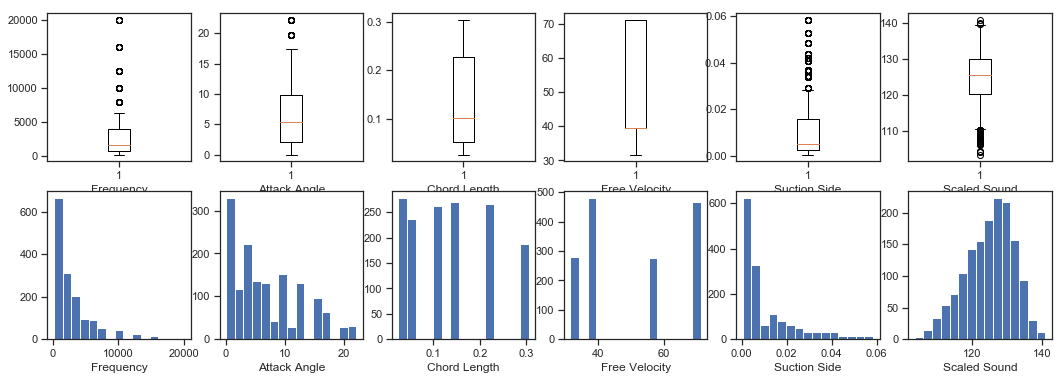

In [386]:
plt.figure(figsize=(18, 6))
for ind, column in enumerate(column_names):
    plt.subplot(2, 6, ind + 1)
    plt.boxplot(data[column], whis=True, showfliers=True)
    plt.xlabel(column)
    
    plt.subplot(2, 6, ind + 7)
    plt.hist(data[column], bins=15)
    plt.xlabel(column)

б) Корреляционная матрица признаков<br> 
Визуализировать корреляционную матрицу признаков (использовать heatmap), сделать выводы.

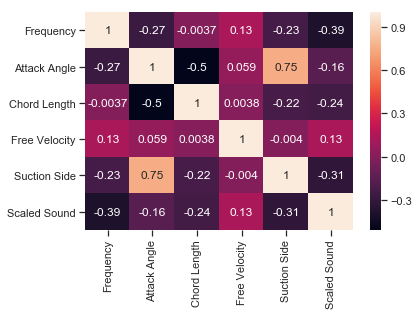

In [387]:
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

в) Диаграммы рассеяния

Построить диаграммы рассеяния для отдельных пар признаков, сделать выводы.

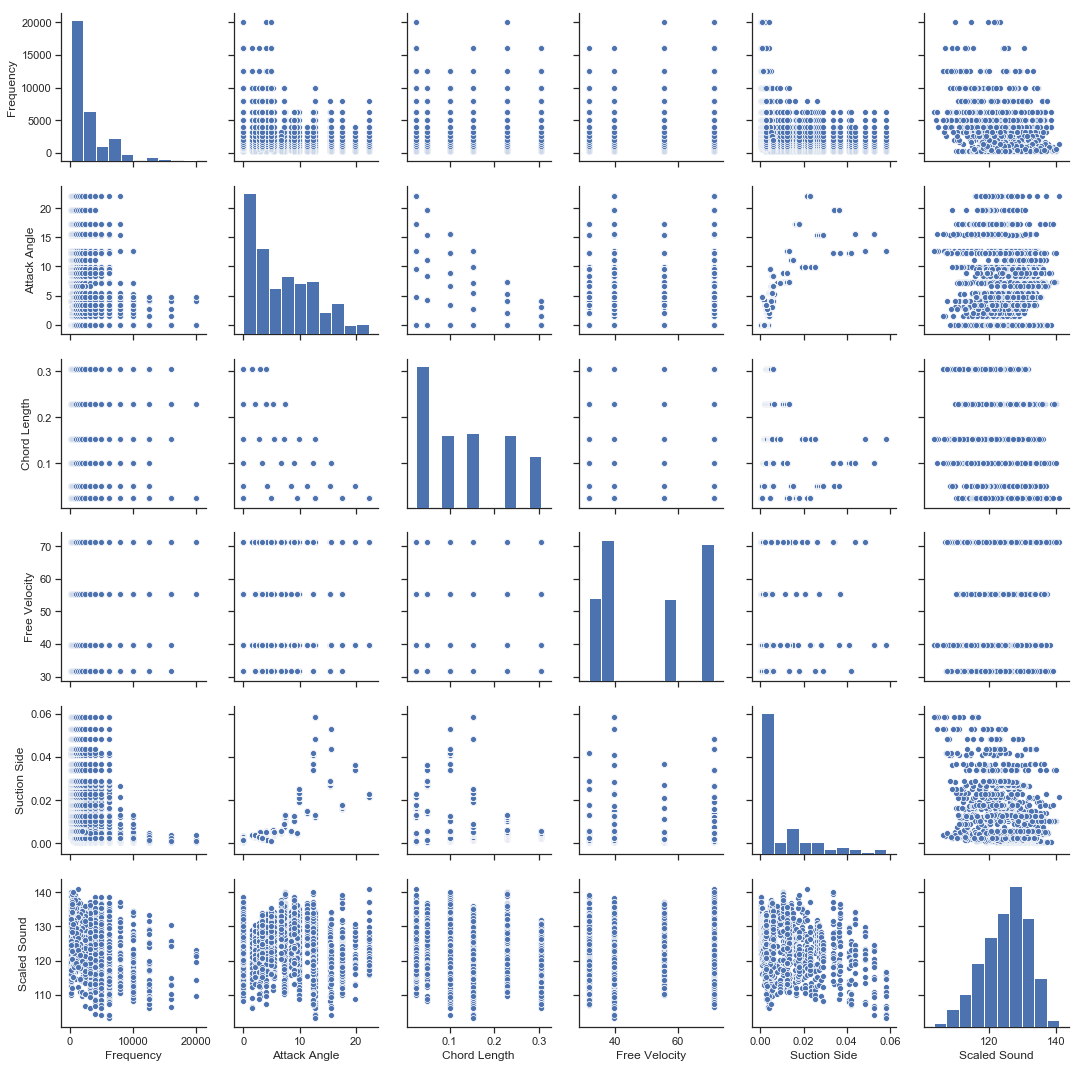

In [388]:
sns.set(style="ticks")
sns.pairplot(data)

1.3.Выводы

Сделать выводы по результатам предварительного визуального анализа исходных данных.

**Выводы:** из пункта а) можно заметить, что сильных выбросов в данных нет. из б) - угол атаки скоррелирован с толщиной смещения (Suction side displacement). в) - явной зависимости признаков от предсказываемого значения уровня давления нет. 

# II. Предобработка данных

## 2.1. Очистка данных

а) Обнаружение и устранение дубликатов

Описать используемые способы обнаружения дубликатов в данных, устранить дубликаты, сделать выводы по результатам.

**Описание:** DataFrame.drop_duplicates. Дубликатов не найдено. 

In [389]:
assert len(data) == len(data.drop_duplicates(subset=None, keep='first', inplace=False))

б) Обнаружение и устранение выбросов

Описать используемые способы обнаружения выбросов в данных, устранить выбросы, сделать выводы по результатам.

**Описание:** Оставляем только те значения, которые лежат в диапазоне от +3 до -3 стандартных отклонений по каждому из столбцов
После удаление, осталось 1471 строка, т.е. ~30 значений с выбросами было удалено. Значения с большой частотой за выбросы не считаем.

In [390]:
for column in column_names[1:]:
    data = data[np.abs(data[column]-data[column].mean()) <= (3*data[column].std())]
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.

In [391]:
len(data)

1471

г) Визуальный анализ очищенных данных

По очищенным данным построить гистограммы распределения и диаграммы Box-and-Whisker (для отдельных признаков) и диаграммы рассеяния для отдельных пар признаков. Сравнить диаграммы с построенными в п. 1.2.

**Видно, что часть выбросов исчезла**

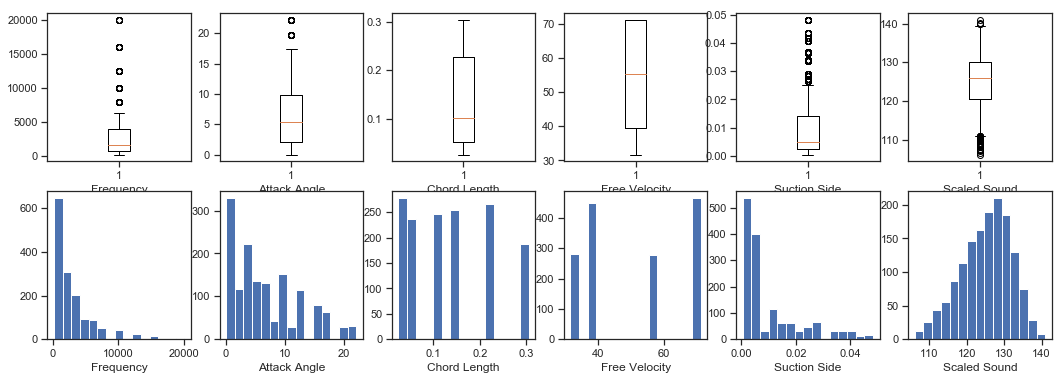

In [392]:
plt.figure(figsize=(18, 6))
for ind, column in enumerate(column_names):
    plt.subplot(2, 6, ind + 1)
    plt.boxplot(data[column], whis=True, showfliers=True)
    plt.xlabel(column)
    
    plt.subplot(2, 6, ind + 7)
    plt.hist(data[column], bins=15)
    plt.xlabel(column)

## 2.2. Преобразование данных

а) Преобразование входов

Описать используемый способ преобразования входных переменных и его параметры, привести обоснование выбранного способа преобразования.

**Преобразование:** нормирование каждого столбца на его среднее и деление на среднеквадратичное отклонение. В итоге должны получить значения в каждом из столбцов в диапазоне примерно [-1, +1]. Т.е. нулевым средним и единичной дисперсией. Это ускоряет процесс обучения и делает признаки одинаковыми по масштабу.

In [396]:
# отделяем целевую переменную
y = data['Scaled Sound']
x = data.drop('Scaled Sound', axis=1)

eps = 1e-5
x = (x - x.mean()) / (x.std() + eps)
x.describe()

,Frequency,Attack Angle,Chord Length,Free Velocity,Suction Side
count,1.471000e+03,1.471000e+03,1.471000e+03,1.471000e+03,1.471000e+03
mean,8.887067e-17,9.511841e-15,1.814901e-14,-5.214652e-15,-5.361675e-16
std,1.000000e+00,9.999983e-01,9.998942e-01,9.999994e-01,9.991320e-01
min,-8.538857e-01,-1.126830e+00,-1.178640e+00,-1.239860e+00,-8.481482e-01
25%,-6.647306e-01,-7.865582e-01,-9.097952e-01,-7.351169e-01,-6.646832e-01
50%,-4.125237e-01,-2.251093e-01,-3.721059e-01,2.807577e-01,-4.619251e-01
75%,3.440969e-01,5.575165e-01,9.721174e-01,1.290243e+00,3.385135e-01
max,5.388235e+00,2.650190e+00,1.778651e+00,1.290243e+00,3.310862e+00


б) Преобразование выходов

Описать используемый способ преобразования выходных переменных и его параметры, привести обоснование выбранного способа преобразования.<br>
**Описание:** Преобразование исходных выходных данных не требуется

в) Визуальный анализ преобразованных данных

По преобразованным данным построить гистограммы распределения и диаграммы Box-and-Whisker (для отдельных признаков) и диаграммы рассеяния для отдельных пар признаков. Сравнить диаграммы с построенными в п. 2.1 г).

Text(0.5, 0, '')

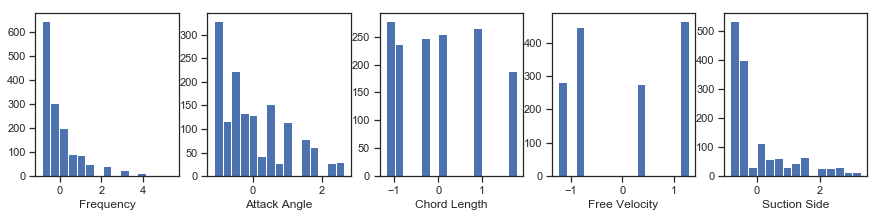

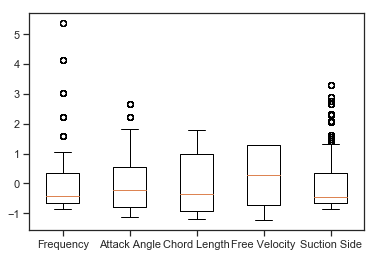

In [397]:
plt.figure(figsize=(18, 3))
plt.figure(1)
for ind, column in enumerate(column_names[:-1]):
    plt.subplot(1, 6, ind + 1)
    plt.hist(x[column], bins=15)
    plt.xlabel(column)
    
plt.figure(0)    
plt.boxplot(x.to_numpy(), whis=True, showfliers=True, labels=column_names[:-1])
plt.xlabel('')

## 2.3.Выводы

Сделать выводы о результатах предобработки данных.

**Вывод:** Избавились от выбросов и нормализовали данные

# III. Формирование признаков

## 3.1. Сокращение числа признаков

При исключении отдельных признаков привести обоснование либо обоснование нецелесообразности исключения признаков из рассмотрения

**Обоснование:** Необходиости исключать признаки нет, так как нет сильной корреляции между ними

## 3.2. Конструирование новых признаков

Предложить способ формирования новых признаков из исходных переменных, предположительно важных для решения поставленной задачи.<br>
**Исходные признаки весьма разрозненны и поэтому сформировать новые признаки из имеющихся так, что бы это имело смысл в решаемой задаче нельзя.** 

## 3.3. Выводы

Сделать выводы по результатам формирования признаков.<br>
**Признаки формировать не нужно**

# IV. Построение и исследование нейросетевых моделей



In [398]:
# Делим данные на обучающую, валидационную и тестовую выборки Holdout(60/30/10)
# Фиксируем random_state для воспроизводимости результатов.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=123)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.25, random_state=123)
print(len(x_train), len(x_val), len(x_test))

882 441 148


In [399]:
# Pandas.DataFrame -> torch.Tensor
x_train, x_val, x_test = t.FloatTensor(x_train.values), t.FloatTensor(x_val.values), \
                                t.FloatTensor(x_test.values)
y_train, y_val, y_test = t.FloatTensor(y_train.values), t.FloatTensor(y_val.values), \
                                t.FloatTensor(y_test.values)

In [367]:
#Определяем архитектуру сети
EMBEDDING_SIZE = 20

class NeuralNet(nn.Module):
    def __init__(self, init=init_weights):
        super(NeuralNet, self).__init__()
        
        self.model = nn.Sequential(
            # 1 скрытый слой
            nn.Linear(5, EMBEDDING_SIZE),
            nn.Sigmoid(),
            # 2 скрытый слой
            nn.Linear(EMBEDDING_SIZE, EMBEDDING_SIZE),
            nn.Tanh(),
            nn.Linear(EMBEDDING_SIZE, 1)
        )      
        self.model.apply(init)

    def forward(self, x):
        output = self.model(x)
        return output
    
def init_weights(module):
    """ Инициализация методом Хавьера"""
    if type(module) == nn.Linear:
        nn.init.xavier_uniform_(module.weight)
        module.bias.data.fill_(0.01)


In [303]:
def get_batch(x_train, y_train, batch_size=50):
        """ Получаем mini-batch из данных"""
        # Перемешиваем индексы
        sh_ind = list(range(x_train.shape[0]))
        np.random.shuffle(sh_ind)
        
        start = 0
        while start < len(x_train):
            x_batch = x_train[sh_ind[start:start + batch_size]]
            y_batch = y_train[sh_ind[start:start + batch_size]]
            start += batch_size
            yield x_batch, y_batch

In [400]:
def train_model(model, opt, n_epochs=30, batch_size=50):
    #Процедура обучения
    L_train = []
    L_val = []
    L_test = []
    acc_test = []
    min_val_loss = 1e10

    for iter in range(n_epochs):
            
        for (X_batch, y_batch) in get_batch(x_train, y_train, batch_size):
            
            # Обнуляем градиенты параметров
            optimizer.zero_grad()
            
            # Обучаемся: считаем лосс, вычисляем градиенты, оптимизируем
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            loss.backward()    
            optimizer.step()
            L_train.append(loss.data.numpy())
            
        val_loss = criterion(model(x_val), y_val)
        test_loss = criterion(model(x_test), y_test)
        L_val.append(val_loss.data.numpy())
        L_test.append(test_loss.data.numpy())
        
        if val_loss < min_val_loss:
            min_val_loss = val_loss
        if val_loss > 3 * min_val_loss:
            print('loss взрывается, выходим!')
            break
    
    return L_train, L_val, L_test

## 4.1. Параметры архитектуры и обучения многослойной нейронной сети

 |Параметр | Значение |
|------|------|
| Функция потерь| Mean Squared Error|
|Число входов сети | 6 |
| Число выходов сети | 1 |
| Число скрытых слоев сети* | 2 |
| Число и АХ нейронов 1-го скрытого слоя* | 20, logistic |
| Число и АХ нейронов 2-го скрытого слоя* | 20, tanh |
| Число и АХ нейронов 3-го скрытого слоя* | - |
| АХ нейронов выходного слоя | - |
| Кросс-валидация | Holdout (60/30/10)| 
| Объёмы обучающей / валидационной / тестовой выборок | 882 / 441 / 148 |
| Режим обучения* | Mini-batch, bs = 50 |
| Метод инициализации весов | метод Хавьера |
| Критерий останова | val_loss > 3* min_val_loss |
| Ранний останов | да |

## 4.2. Исследование простого градиентного метода обучения

а) Исследование влияния параметра скорости обучения на качество обучения

Построить графики зависимости ошибки сети на обучающей, валидационной и тестовой выборках от времени обучения (кривые обучения) при различных значениях параметра скорости обучения a (значения указать в таблице ниже).

Указание: обучение каждый раз начинать из одной и той же начальной точки.

In [414]:
lr_range = [1e-3, 1.5e-3, 1e-2, 1.5e-2]
epochs = 30
model = NeuralNet()
criterion = nn.MSELoss(reduction='mean')
optimizer = t.optim.SGD(model.parameters(),lr=0.001)
# Немного обучим модель, что бы не получать слишком большой loss
_, _, _ = train_model(model, optimizer, n_epochs=2)

In [415]:
log = []
for lr in lr_range:
    # Копируем модель
    model_copy = type(model)() # пустышка
    model_copy.load_state_dict(model.state_dict()) # копируем веса и всё остальное
    optimizer = t.optim.SGD(model_copy.parameters(),lr=lr)
    log.append(train_model(model_copy, optimizer, n_epochs=20))
    

/home/zakajd/anaconda3/envs/dl/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


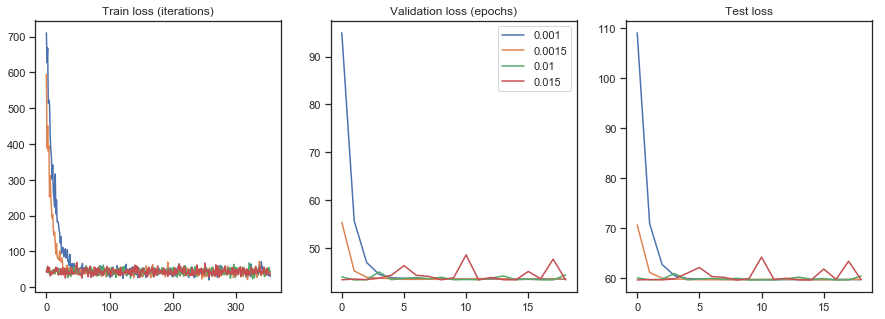

In [416]:
# Визуализируем результаты
plt.figure(figsize=(15, 5))
for i in range(len(lr_range)):
    # Train loss
    plt.subplot(1, 3, 1)
    # Пропускаем несколько первых точек где очень большой loss
    plt.plot(log[i][0][5:])
    plt.title('Train loss (iterations)')
    
    # Validation loss
    plt.subplot(1, 3, 2)
    plt.plot(log[i][1][1:], label=lr_range[i])
    plt.legend()
    plt.title('Validation loss (epochs)')
    
    # Test loss
    plt.subplot(1, 3, 3)
    plt.plot(log[i][2][1:])
    plt.title('Test loss')




б) Заполнить таблицу по результатам обучения

In [424]:
for ind, lr in enumerate(lr_range):
    print('Скорость обучения: {}, Число эпох: {}, Ошибка на обучающей выборке: {:.3f}, Ошибка на тестовой: {:.3f}'.format(
                                lr, 30, log[ind][0][-1], log[ind][2][-1]))

Скорость обучения: 0.001, Число эпох: 30, Ошибка на обучающей выборке: 30.116, Ошибка на тестовой: 59.668
Скорость обучения: 0.0015, Число эпох: 30, Ошибка на обучающей выборке: 45.544, Ошибка на тестовой: 59.726
Скорость обучения: 0.01, Число эпох: 30, Ошибка на обучающей выборке: 44.006, Ошибка на тестовой: 60.387
Скорость обучения: 0.015, Число эпох: 30, Ошибка на обучающей выборке: 36.147, Ошибка на тестовой: 59.681


в) Выводы

Сделать выводы о влиянии параметра скорости обучения на качество обучения.<br>
**Выводы:** Слишком маленькая скорость обучения приводит к медленному уменьшению ошибки, слишком большая скорость может привести к тому, что ошибка разойдется и уйдёт в +бесконечность. В начальный момент стоит использовать бОльшую скорость обучения,а затем постепенно её снижать.

In [425]:
best_lr = 0.015

## 4.3. Исследование методов GDM и NAG

а) Исследование влияния параметра момента на качество обучения

Построить графики зависимости ошибки сети на обучающей, валидационной и тестовой выборках от времени обучения (кривые обучения) при различных значениях параметра момента m (указать в таблице ниже).

Указание: параметр скорости обучения выбрать наилучшим по результатам исследований п. 4.2.

In [426]:
moment_range = [0.0001, 0.5, 0.9, 0.99]
log_gdm = []
log_nag = []
for moment in moment_range:
    # GDM
    model_copy = type(model)() 
    model_copy.load_state_dict(model.state_dict()) 
    optimizer = t.optim.SGD(model_copy.parameters(),lr=best_lr, momentum=moment)
    log_gdm.append(train_model(model_copy, optimizer, n_epochs=20))
    
    # NAG
    model_copy = type(model)() # пустышка
    model_copy.load_state_dict(model.state_dict()) # копируем веса и всё остальное 
    optimizer = t.optim.SGD(model_copy.parameters(),lr=best_lr, momentum=moment, nesterov=True)
    log_nag.append(train_model(model_copy, optimizer, n_epochs=20))
    

loss взрывается, выходим!


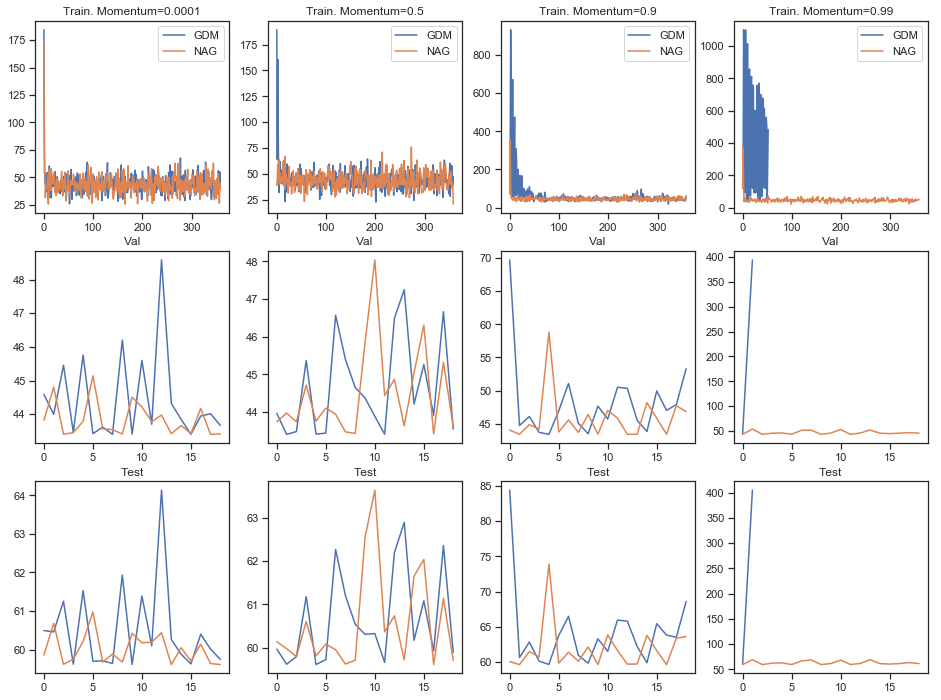

In [428]:
# Визуализируем результаты
plt.figure(figsize=(16, 12))
for i in range(len(moment_range)):
    # GDM Train loss
    plt.subplot(3, 4, i + 1)
    plt.plot(log_gdm[i][0][1:], label='GDM')
    # NAG Train loss
    plt.plot(log_nag[i][0][1:], label='NAG')
    plt.title('Train. Momentum={}'.format(moment_range[i]))
    plt.legend()
    
    # GDM Val loss
    plt.subplot(3, 4, i + 5)
    plt.plot(log_gdm[i][1][1:])
    # NAG Val loss
    plt.plot(log_nag[i][1][1:])
    plt.title('Val')
    
        
    # GDM Val loss
    plt.subplot(3, 4, i + 9)
    plt.plot(log_gdm[i][2][1:])
    # NAG Val loss
    plt.plot(log_nag[i][2][1:])
    plt.title('Test')




б) Заполнить таблицу по результатам обучения

In [429]:
for ind, moment in enumerate(moment_range):
    print('Метод: GDM, Момент:{}, Число эпох: {}, Ошибка на обучающей выборке: {:.3f}, Ошибка на тестовой: {:.3f}'.format(
                                moment, 30, log_gdm[ind][0][-1], log_gdm[ind][2][-1]))
    print('Метод: NAG, Момент:{}, Число эпох: {}, Ошибка на обучающей выборке: {:.3f}, Ошибка на тестовой: {:.3f}'.format(
                            moment, 30, log_nag[ind][0][-1], log_nag[ind][2][-1]))

Метод: GDM, Момент:0.0001, Число эпох: 30, Ошибка на обучающей выборке: 45.055, Ошибка на тестовой: 59.747
Метод: NAG, Момент:0.0001, Число эпох: 30, Ошибка на обучающей выборке: 39.550, Ошибка на тестовой: 59.615
Метод: GDM, Момент:0.5, Число эпох: 30, Ошибка на обучающей выборке: 39.879, Ошибка на тестовой: 59.890
Метод: NAG, Момент:0.5, Число эпох: 30, Ошибка на обучающей выборке: 21.056, Ошибка на тестовой: 59.709
Метод: GDM, Момент:0.9, Число эпох: 30, Ошибка на обучающей выборке: 61.249, Ошибка на тестовой: 68.593
Метод: NAG, Момент:0.9, Число эпох: 30, Ошибка на обучающей выборке: 52.512, Ошибка на тестовой: 63.608
Метод: GDM, Момент:0.99, Число эпох: 30, Ошибка на обучающей выборке: 483.414, Ошибка на тестовой: 404.752
Метод: NAG, Момент:0.99, Число эпох: 30, Ошибка на обучающей выборке: 50.822, Ошибка на тестовой: 61.573


в) Выводы

Сделать выводы о влиянии параметра момента в методах GDM и NAG на качество обучения.<br>
**Выводы:** Выбор оптимального момента способен значительно ускорить скорость обучения сети. Слишком маленькие значения момента делают данные методы похожими на обыкновенный SGD. Слишком большие долго сохраняют "память" о неоптимальных направлениях и методы сходятся медленее (см. верхний правый график).

In [430]:
best_momentum = 0.9

## 4.4. Исследование методов наискорейшего спуска и сопряжённых градиентов

а) Сравнение кривых обучения

Построить графики зависимости ошибки сети на обучающей, валидационной и тестовой выборках от времени обучения (кривые обучения) для: 1) метода наискорейшего спуска; 2) метода Флетчера-Ривса; 3) метода Полака-Райбера.

Text(0.5, 1.0, 'Test')

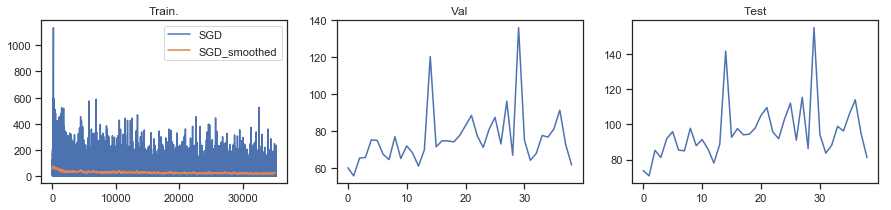

In [440]:
log_sgd = []
log_FR = []
log_PR = []

# SGD
model_copy = type(model)() 
model_copy.load_state_dict(model.state_dict()) 
optimizer = t.optim.SGD(model_copy.parameters(),lr=best_lr)
# batch_size = 1, так как стохастический градиентный спуск
log_sgd.append(train_model(model_copy, optimizer, n_epochs=40, batch_size=1))

# # FR
# model_copy = type(model)() # пустышка
# model_copy.load_state_dict(model.state_dict()) # копируем веса и всё остальное 
# optimizer = t.optim.SGD(model_copy.parameters(),lr=0.01, momentum=moment, nesterov=True)
# log_nag.append(train_model(model_copy, optimizer, n_epochs=20))

# # PR
# model_copy = type(model)() # пустышка
# model_copy.load_state_dict(model.state_dict()) # копируем веса и всё остальное 
# optimizer = t.optim.SGD(model_copy.parameters(),lr=0.01, momentum=moment, nesterov=True)
# log_nag.append(train_model(model_copy, optimizer, n_epochs=20))


# Визуализируем результаты
plt.figure(figsize=(15, 3))

# SGD Train loss
plt.subplot(1, 3, 1)
plt.plot(log_sgd[0][0][4:], label='SGD')
# FR Train loss
# PR Train loss
plt.title('Train.')
# т.к. график для Train очень шумный, дополнительно отрисуем сглаженный вариант
cumsum, moving_aves = [0], []
N = 200
for i, x in enumerate(log_sgd[0][0][5:], 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
        #can do stuff with moving_ave here
        moving_aves.append(moving_ave)       
plt.plot(moving_aves, label='SGD_smoothed')   
plt.legend()

# SGD Val loss
plt.subplot(1, 3, 2)
plt.plot(log_sgd[0][1][1:])
plt.title('Val')


# SGD Test loss
plt.subplot(1, 3, 3)
plt.plot(log_sgd[0][2][1:])
plt.title('Test')


б) Заполнить таблицу по результатам обучения

In [439]:
print('Метод: SGD, Число эпох: {}, Ошибка на обучающей выборке: {:.3f}, Ошибка на тестовой: {:.3f}'.format(
                                30, log_sgd[0][0][-1], log_sgd[0][2][-1]))

Метод: SGD, Число эпох: 30, Ошибка на обучающей выборке: 9.744, Ошибка на тестовой: 185.276


в) Выводы

Сделать выводы о качестве обучения по методам наискорейшего спуска и сопряжённых градиентов.

**Вывод:** Качество обучения SGD не очень хорошее, так как градиенты по одному объекту слишком шумные и функция очень медленно сходится к максимуму (либо вообще расходится, если подобрать неудачную скорость обучения

## 4.5. Исследование метода AdaGrad

а) Кривые обучения

Построить графики зависимости ошибки сети на обучающей, валидационной и тестовой выборках от времени обучения (кривые обучения).

Указание: базовую скорость обучения выбрать наилучшей по результатам исследований п. 4.2.

Text(0.5, 1.0, 'Test loss')

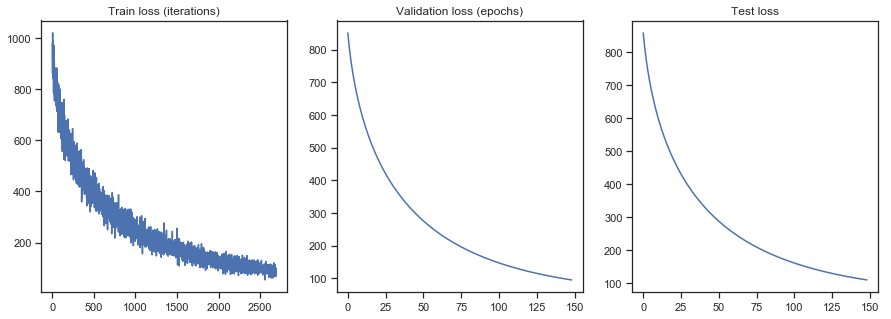

In [443]:
log = []

# Копируем модель
model_copy = type(model)() # пустышка
model_copy.load_state_dict(model.state_dict()) # копируем веса и всё остальное
optimizer = t.optim.Adagrad(model_copy.parameters(),lr=best_lr)
log.append(train_model(model_copy, optimizer, n_epochs=150))


# Визуализируем результаты
plt.figure(figsize=(15, 5))

# Train loss
plt.subplot(1, 3, 1)
plt.plot(log[0][0][5:])
plt.title('Train loss (iterations)')

# Validation loss
plt.subplot(1, 3, 2)
plt.plot(log[0][1][1:])
plt.title('Validation loss (epochs)')

# Test loss
plt.subplot(1, 3, 3)
plt.plot(log[0][2][1:])
plt.title('Test loss')


б) Исследование динамики скорости обучения

Построить графики зависимости скорости обучения отдельных синаптических коэффициентов сети (выбрать произвольно из разных слоёв сети) от времени обучения, а также графики зависимости минимальной, максимальной и средней (по всем настраиваемым параметрам сети) скорости обучения от времени обучения.

**Pass**

In [498]:
# model_copy = type(model)() # пустышка
# model_copy.load_state_dict(model.state_dict()) # копируем веса и всё остальное
# optimizer = t.optim.Adagrad(model_copy.parameters(),lr=best_lr)

# #Процедура обучения
# L_train = []
# L_val = []
# L_test = []
# min_val_loss = 1e10
# w1_grad = []
# w2_grad = []

# for iter in range(70):

#     for (X_batch, y_batch) in get_batch(x_train, y_train):

#         # Обнуляем градиенты параметров
#         optimizer.zero_grad()

#         # Обучаемся: считаем лосс, вычисляем градиенты, оптимизируем
#         predictions = model(X_batch)
#         loss = criterion(predictions, y_batch)
#         loss.backward()    
#         optimizer.step()
#         w1_grad.append(model.model[0].weight.grad[0])
#         L_train.append(loss.data.numpy())

#     val_loss = criterion(model(x_val), y_val)
#     test_loss = criterion(model(x_test), y_test)
#     L_val.append(val_loss.data.numpy())
#     L_test.append(test_loss.data.numpy())

#     if val_loss < min_val_loss:
#         min_val_loss = val_loss
#     if val_loss > 3 * min_val_loss:
#         print('loss взрывается, выходим!')
#         break

In [501]:
# optimizer.param_groups
# optimizer.zero_grad()
# model.model[0].weight.grad[0]
# model.model
# net[2].weight.register_hook(lambda grad: grad * 0)
# w1_grad

в) Заполнить таблицу по результатам обучения

In [502]:
print('Метод: AdaGrad, Число эпох: {}, Ошибка на обучающей выборке: {:.3f}, Ошибка на тестовой: {:.3f}'.format(
                                150, log[0][0][-1], log[0][2][-1]))

Метод: AdaGrad, Число эпох: 150, Ошибка на обучающей выборке: 94.688, Ошибка на тестовой: 109.402


г) Выводы

Сделать выводы о качестве обучения по методу AdaGrad.<br>
**Выводы**: На графиках видно, что из-за постоянного накопления истории об обновлении каждого из весов модели (adaptive gradients), в какой-то момент обучение практически полностью останавливается (число в знаменателе формулы для обновления весов большое -> обновление весов очень маленькое).
Из-за снижения скорости, данный метод сходится медленее, чем методы рассмотренные в следующих главах (например, Adam).

## 4.6. Исследование методов RMSProp и AdaDelta

а) Сравнение кривых обучения

Построить графики зависимости ошибки сети на обучающей, валидационной и тестовой выборках от времени обучения (кривые обучения) при различных значениях параметра сглаживания r (значения указать в таблице ниже) для методов RMSProp и AdaDelta.

Указание: базовую скорость обучения в методе RMSProp выбрать наилучшей по результатам исследований п. 4.2.

/home/zakajd/anaconda3/envs/dl/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


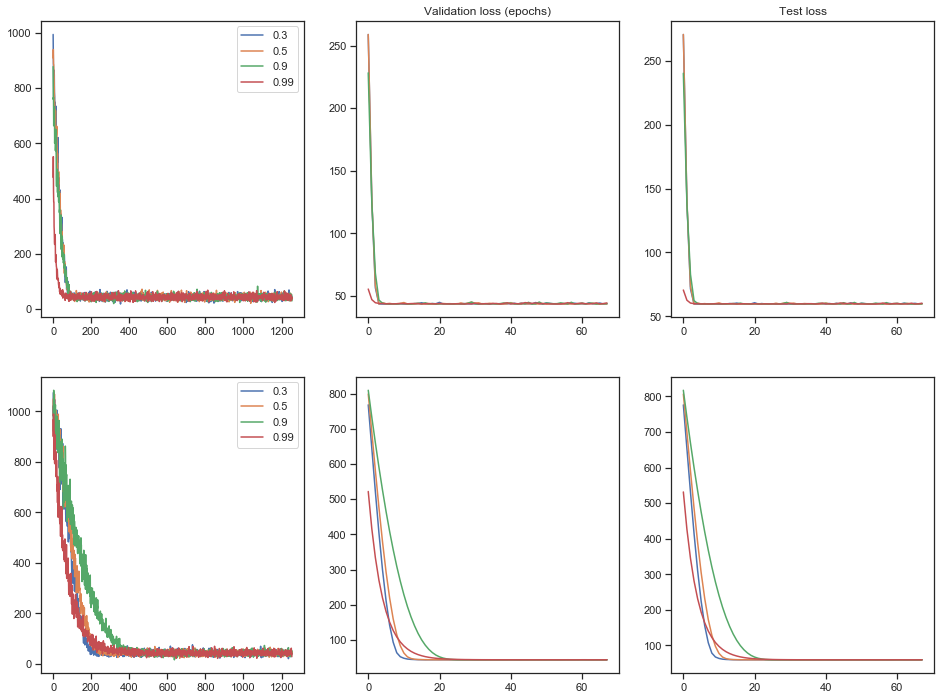

In [509]:
log_rmsprop = []
log_adadelta = []

rho_range = [0.3, 0.5, 0.9, 0.99]

for rho in rho_range:
    # RMSProp
    model_copy = type(model)() # пустышка
    model_copy.load_state_dict(model.state_dict()) # копируем веса и всё остальное
    optimizer = t.optim.RMSprop(model_copy.parameters(),lr=best_lr, alpha=rho)
    log_rmsprop.append(train_model(model_copy, optimizer, n_epochs=70))

    # AdaDelta
    model_copy = type(model)() # пустышка
    model_copy.load_state_dict(model.state_dict()) # копируем веса и всё остальное
    optimizer = t.optim.Adadelta(model_copy.parameters(),lr=1, rho=rho)
    log_adadelta.append(train_model(model_copy, optimizer, n_epochs=70))



# Визуализируем результаты
plt.figure(figsize=(16, 12))
for i in range(len(rho_range)):
    
    # Train loss
    plt.subplot(2, 3, 1)
    plt.plot(log_rmsprop[i][0][5:], label=rho_range[i])
    plt.legend()
    plt.subplot(2, 3, 4)
    plt.plot(log_adadelta[i][0][5:], label=rho_range[i])
    plt.legend()
    
    # Validation loss
    plt.subplot(2, 3, 2)
    plt.plot(log_rmsprop[i][1][2:])
    plt.title('Validation loss (epochs)')
    plt.subplot(2, 3, 5)
    plt.plot(log_adadelta[i][1][2:])

    # Test loss
    plt.subplot(2, 3, 3)
    plt.plot(log_rmsprop[i][2][2:])
    plt.title('Test loss')
    plt.subplot(2, 3, 6)
    plt.plot(log_adadelta[i][2][2:])




б) Исследование динамики скорости обучения

При различных значениях параметра сглаживания построить графики зависимости скорости обучения отдельных синаптических коэффициентов сети (выбрать произвольно из разных слоёв сети) от времени обучения, а также графики зависимости минимальной, максимальной и средней (по всем настраиваемым параметрам сети) скорости обучения от времени обучения для методов RMSProp и AdaDelta.
**Pass**

в) Заполнить таблицу по результатам обучения

In [508]:
print('Метод: RMSProp, Число эпох: {}, Ошибка на обучающей выборке: {:.3f}, Ошибка на тестовой: {:.3f}'.format(\
                                 70, log_rmsprop[0][0][-1], log_rmsprop[0][2][-1]))
print('Метод: Adadelta, Число эпох: {}, Ошибка на обучающей выборке: {:.3f}, Ошибка на тестовой: {:.3f}'.format(
                            70, log_adadelta[0][0][-1], log_adadelta[0][2][-1]))

Метод: RMSProp, Число эпох: 70, Ошибка на обучающей выборке: 36.284, Ошибка на тестовой: 59.640
Метод: Adadelta, Число эпох: 70, Ошибка на обучающей выборке: 49.869, Ошибка на тестовой: 59.713


г) Выводы

Сделать выводы о влиянии параметра сглаживания в методах RMSProp и AdaDelta на качество обучения. <br>
**Выводы:** Чем ближе rho к 1 тем дольше RMSProp и Adadelta накапливают начальным значение для обновления мало используемых весов. В нашей задаче оптималь взять маленький rho

## 4.7. Исследование метода Adam

а) Сравнение кривых обучения

Построить графики зависимости ошибки сети на обучающей, валидационной и тестовой выборках от времени обучения (кривые обучения) при различных значениях параметров сглаживания b1, b2 (значения указать в таблице ниже).

Указание 1: базовую скорость обучения выбрать наилучшей по результатам исследований п. 4.2.

Указание 2: в одном из экспериментов выбрать b1 и b2 равными наилучшему значению параметра r по результатам исследований п. 4.6.

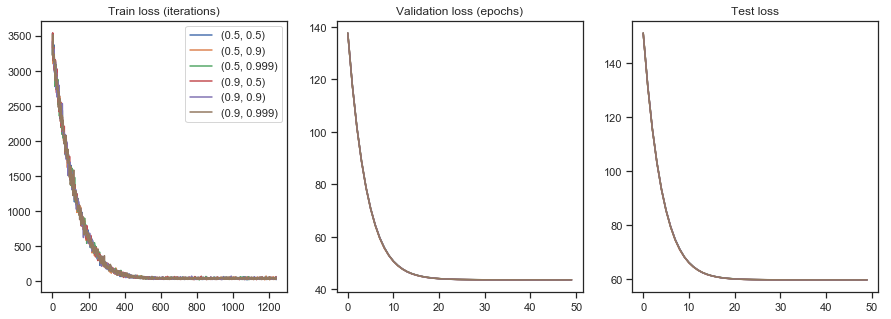

In [354]:
log_adam = []
beta_range = [(0.5, 0.5), (0.5, 0.9), (0.5, 0.999), (0.9, 0.5), (0.9, 0.9), (0.9, 0.999)]

for beta in beta_range:
    # Adam
    model_copy = type(model)() 
    model_copy.load_state_dict(model.state_dict())
    optimizer = t.optim.Adam(model_copy.parameters(),lr=0.01)

    log_adam.append(train_model(model_copy, optimizer, n_epochs=70))

# Визуализируем результаты
plt.figure(figsize=(15, 5))
for i in range(len(beta_range)):
    
    # Train loss
    plt.subplot(1, 3, 1)
    plt.plot(log_adam[i][0][20:], label=beta_range[i])
    plt.title('Train loss (iterations)')
    plt.legend()

    # Validation loss
    plt.subplot(1, 3, 2)
    plt.plot(log_adam[i][1][20:])
    plt.title('Validation loss (epochs)')

    # Test loss
    plt.subplot(1, 3, 3)
    plt.plot(log_adam[i][2][20:],)
    plt.title('Test loss')

б) Исследование динамики скорости обучения

При различных значениях параметров сглаживания построить графики зависимости скорости обучения отдельных синаптических коэффициентов сети (выбрать произвольно из разных слоёв сети) от времени обучения, а также графики зависимости минимальной, максимальной и средней (по всем настраиваемым параметрам сети) скорости обучения от времени обучения.

в) Заполнить таблицу по результатам обучения

г) Выводы

Сделать выводы о влиянии параметров сглаживания в методе Adam на качество обучения.

## 4.8. Исследование метода RProp

а) Кривые обучения

Построить графики зависимости ошибки сети на обучающей, валидационной и тестовой выборках от времени обучения (кривые обучения).

Text(0.5, 1.0, 'Test loss')

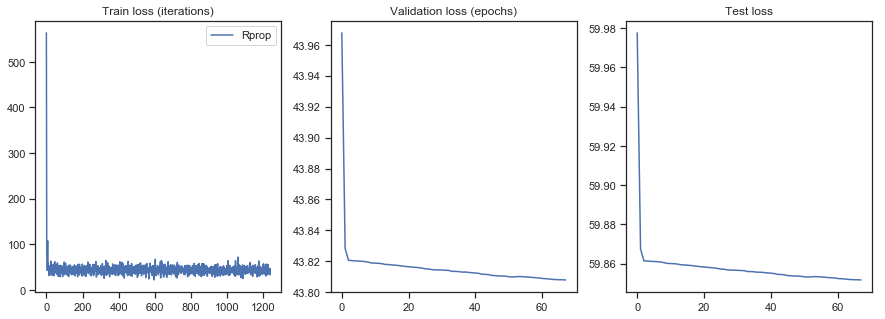

In [361]:
log_rprop = []

# RProp
model_copy = type(model)() # пустышка
model_copy.load_state_dict(model.state_dict()) # копируем веса и всё остальное
optimizer = t.optim.Rprop(model_copy.parameters(),lr=0.01)
log_rprop.append(train_model(model_copy, optimizer, n_epochs=70))


# Визуализируем результаты
plt.figure(figsize=(15, 5))

# Train loss
plt.subplot(1, 3, 1)
plt.plot(log_rprop[0][0][20:], label='Rprop')
plt.title('Train loss (iterations)')
plt.legend()

# Validation loss
plt.subplot(1, 3, 2)
plt.plot(log_rprop[0][1][2:])
plt.title('Validation loss (epochs)')

# Test loss
plt.subplot(1, 3, 3)
plt.plot(log_rprop[0][2][2:])
plt.title('Test loss')


б) Исследование динамики приращений весов

Построить графики зависимости приращений отдельных синаптических коэффициентов сети (выбрать произвольно из разных слоёв сети) от времени обучения, а также графики зависимости минимального, максимального и среднего (по всем настраиваемым параметрам сети) приращения от времени обучения. <br>
**Pass**

в) Заполнить таблицу по результатам обучения

г) Выводы

Сделать выводы о качестве обучения по методу RProp.

## 4.9. Исследование методов Левенберга-Маркардта и BFGS

а) Кривые обучения

Построить графики зависимости ошибки сети на обучающей, валидационной и тестовой выборках от времени обучения (кривые обучения) для: 1) метода Левенберга-Маркардта; 2) метода BFGS.

Text(0.5, 1.0, 'Test loss')

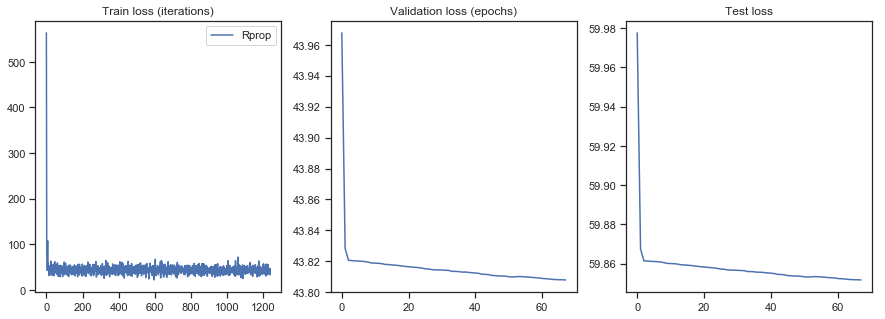

In [362]:
log_LM = []
log_BFGS = []

# LM
model_copy = type(model)() # пустышка
model_copy.load_state_dict(model.state_dict()) # копируем веса и всё остальное
optimizer = t.optim.Rprop(model_copy.parameters(),lr=0.01)
log_rprop.append(train_model(model_copy, optimizer, n_epochs=70))


# Визуализируем результаты
plt.figure(figsize=(15, 5))

# Train loss
plt.subplot(1, 3, 1)
plt.plot(log_rprop[0][0][20:], label='Rprop')
plt.title('Train loss (iterations)')
plt.legend()

# Validation loss
plt.subplot(1, 3, 2)
plt.plot(log_rprop[0][1][2:])
plt.title('Validation loss (epochs)')

# Test loss
plt.subplot(1, 3, 3)
plt.plot(log_rprop[0][2][2:])
plt.title('Test loss')


б) Заполнить таблицу по результатам обучения

в) Выводы

Сделать выводы о качестве обучения по методам Левенберга-Маркардта и BFGS.

## 4.10. Исследование метода стохастического градиента

а) Сравнение кривых обучения

Построить графики зависимости ошибки сети на обучающей, валидационной и тестовой выборках от времени обучения (кривые обучения) при различных размерах mini-batch’ей (указаны в таблице ниже).

Указание: параметр скорости обучения простого градиентного метода выбрать наилучшим по результатам исследований п. 4.2.

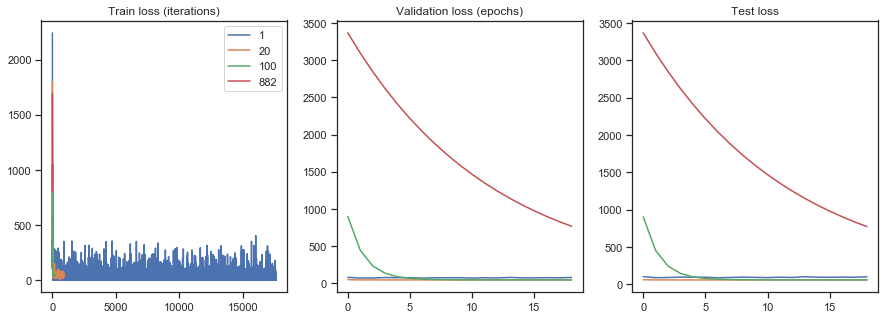

In [366]:
log_SGD = []
batch_range = [1, 20, 100, len(x_train)]

for batch in batch_range:
    # SGD
    model_copy = type(model)() 
    model_copy.load_state_dict(model.state_dict()) 
    optimizer = t.optim.SGD(model_copy.parameters(),lr=0.001)
    log_SGD.append(train_model(model_copy, optimizer, n_epochs=20, batch_size=batch))

# Визуализируем результаты
plt.figure(figsize=(15, 5))
for i in range(len(batch_range)):
    
    # Train loss
    plt.subplot(1, 3, 1)
    plt.plot(log_SGD[i][0][10:], label=batch_range[i])
    plt.title('Train loss (iterations)')
    plt.legend()

    # Validation loss
    plt.subplot(1, 3, 2)
    plt.plot(log_SGD[i][1][1:])
    plt.title('Validation loss (epochs)')

    # Test loss
    plt.subplot(1, 3, 3)
    plt.plot(log_SGD[i][2][1:],)
    plt.title('Test loss')
    

б) Заполнить таблицу по результатам обучения

в) Исследование влияния размера mini-batch’а на качество обучения

Построить графики зависимости ошибок обученной сети на обучающей и тестовой выборках от размера mini-batch’а.

г) Выводы

Сделать выводы о влиянии размера mini-batch’а в методе стохастического градиента на качество обучения.

## 4.11. Сравнение методов обучения

а) Сравнение числа эпох обучения

Построить столбиковую диаграмму числа эпох обучения (по горизонтальной оси – метод обучения (значения параметров методов взять наилучшими по результатам соответствующего исследования), по вертикальной оси – число эпох обучения).

б) Сравнение качества обученных нейросетевых моделей

Построить столбиковую диаграмму ошибок обученной сети на обучающей и тестовой выборках (по горизонтальной оси – метод обучения (значения параметров методов взять наилучшими по результатам соответствующего исследования), по вертикальной оси – ошибки обученной сети).

в) Выводы

Сделать выводы по результатам сравнения методов обучения (GD, GDM, NAG, SGD, Fletcher-Reeeves, Polak-Ribiere, AdaGrad, RMSProp, AdaDelta, RProp, LM, BFGS, Stochastic GD).

**Вывод:** из-за маленького числа данных качетсвенный анализ методов невозможен. Из графиков видно, что Adam сходится быстрее всех при стандартных параметрах. GD, NAG и  тоже могут достигать оптимальных значений, но требует более тщательного подбора параметров и контроля при обучении.

## 4.12. Исследование влияния способа инициализации весов на качество обучения

а) Исследование прямого информационного потока в сети

Для произвольно взятых нейронов из каждого слоя построить графики зависимости среднего значения и с.к.о. (по примерам обучающей выборки) выходов при инициализации весов сети случайными числами, распределёнными по нормальному закону N(0; s), от значения с.к.о. s. Отметить на графике значения s, рассчитанные по методу Хавьера для различных слоёв сети.

Определяем архитектуру сети

In [373]:
def init_random(module):
    """ Инициализация случайными весами"""
    if type(module) == nn.Linear:
        nn.init.uniform_(module.weight, a=0.0, b=1.0)
        module.bias.data.fill_(0.01)

def init_norm(module):
    """ Инициализация методом Хавьера"""
    if type(module) == nn.Linear:
        nn.init.normal_(module.weight, mean=0, std=)
        module.bias.data.fill_(0.01)
        
net = NeuralNet(init=init_random)


б) Исследование обратного информационного потока в сети

Для тех же нейронов построить графики зависимости среднего значения и с.к.о. (по примерам обучающей выборки) двойственных потенциалов при инициализации весов сети случайными числами, распределёнными по нормальному закону N(0; s), от значения с.к.о. s. Отметить на графике значения s, рассчитанные по методу Хавьера для различных слоёв сети.

в) Исследование распределений выходов и двойственных потенциалов нейронов

Построить гистограммы распределения выходов и двойственных потенциалов (по примерам обучающей выборки) тех же нейронов, получаемые: 1) при слишком малых значениях s; 2) при значениях s, рассчитанных по методу Хавьера; 3) при слишком больших значениях s.

г) Кривые обучения

Построить графики зависимости ошибки сети на обучающей и тестовой выборках от времени обучения (кривые обучения) при инициализации весов сети случайными числами, распределёнными по нормальному закону N(0; s): 1) при слишком малых значениях s; 2) при значениях s, рассчитанных по методу Хавьера; 3) при слишком больших значениях s.

Указание: для обучения использовать простой градиентный метод, параметр скорости обучения выбрать наилучшим по результатам исследований п. 4.2.

д) Заполнить таблицу по результатам обучения

Указание 1: для обучения использовать простой градиентный метод, параметр скорости обучения выбрать наилучшим по результатам исследований п. 4.2.

Указание 2: для расчета среднего значения и с.к.о. ошибки обученной сети проводить многократное (не менее 10 раз) обучение из различных начальных точек.

е) Выводы

Сделать выводы о влиянии способа инициализации весов на качество обучения

## 4.13. Методы кросс-валидации

а) Заполнить таблицу по результатам кросс-валидации различными методами

Указание 1: для обучения использовать простой градиентный метод, параметр скорости обучения выбрать наилучшим по результатам исследований п. 4.2.

Указание 2: инициализацию сети провести один раз наилучшим методом по результатам исследований п. 4.12, запуски процедуры обучения каждый раз проводить из одной и той же начальной точки.

Указание 3: Внутри каждого фолда кросс-валидации разбивать обучающие данные на обучающую и валидационную выборки в отношении 70/30.

б) Исследование k-fold кросс-валидации

Построить графики зависимости среднего значения и с.к.о. (по фолдам) ошибки обученной сети на обучающей и тестовой выборках от числа фолдов k.

в) Выводы

Сделать выводы по результатам исследований различных способов кросс-валидации

## 4.14. Исследование различных архитектур нейронных сетей

а) Исследование зависимости качества обучения от числа нейронов в скрытых слоях

Провести обучение нейронных сетей с различным числом нейронов в скрытых слоях. По результатам обучения заполнить таблицу.

Указание 1: при выполнении пп. а)–б) для обучения использовать метод сопряженных градиентов, Левенберга-Маркардта или BFGS.

Указание 2: при выполнении пп. а)–б) среднее значение и с.к.о. ошибок на обучающей и тестовой выборках считать по результатам 10-fold кросс-валидации, внутри каждого фолда разбивать обучающие данные на обучающую и валидационную выборки в отношении 70/30.

б) Исследование зависимости качества обучения от активационных характеристик нейронов

Для наилучшей архитектуры, найденной в п. а), провести обучение сети при различных активационных характеристиках нейронов скрытых слоёв. По результатам обучения заполнить таблицу.

## 4.15. L1 и L2 регуляризация весов

а) Исследование зависимости качества обученной сети от параметра регуляризации

Построить график зависимости ошибки обученной сети на обучающей и тестовой выборках от значения параметра l: 1) при L1-регуляризации весов; 2) при L2-регуляризации весов.

Указание: исследования в пп. а)–в) проводить для лучшей архитектуры, найденной в п. 4.14, для обучения использовать один из градиентных методов с адаптивным шагом, параметры метода выбрать наилучшими по результатам исследований пп. 4.5–4.7.

б) Исследование зависимости нормы вектора синаптических коэффициентов от параметра регуляризации

Построить графики зависимости L1 и L2 нормы вектора синаптических коэффициентов обученной сети от параметра l: 1) при L1-регуляризации; 2) при L2-регуляризации.

в) Сравнение кривых обучения при различных значениях параметра регуляризации

При фиксированных значениях параметра l (l » 0, l > 0, l >> 0) построить графики зависимости L1 и L2 нормы вектора синаптических коэффициентов сети от времени обучения.

г) Выводы

Сделать выводы по результатам использования L1 и L2 регуляризации весов.

## 4.16. Инъекция шума

а) Исследование зависимости качества обученной сети от параметра зашумления

Построить графики зависимости ошибки обученной сети на обучающей и тестовой выборках от с.к.о. s шума при: 1) зашумлении входов; 2) зашумлении градиентов.

Указание 1: шум генерировать из нормального распределения N(0; s).

Указание 2: исследования в пп. а)–б) проводить для лучшей архитектуры, найденной в п. 4.14, для обучения использовать один из градиентных методов с адаптивным шагом, параметры метода выбрать наилучшими по результатам исследований пп. 4.5–4.7.

б) Сравнение кривых обучения

Построить кривые обучения на обучающей, валидационной и тестовой выборках при обучении: 1) без зашумления; 2) с зашумлением входов; 3) с зашумлением градиентов; 4) с зашумлением входов и градиентов.

Указание: шум генерировать из нормального распределения N(0; s), использовать с.к.о. шума s, при котором наблюдается наименьшая ошибка сети (по результатам исследований в п. а)) либо задать произвольно.

в) Выводы

Сделать выводы по результатам использования инъекции шума.

# V. Исследование обученной нейросетевой модели

Указание: среди всех построенных в пп. 4.2–4.16 нейросетевых моделей выбрать модель с наименьшими значениями ошибок на обучающей и валидационной выборках.

## 5.1.Исследование качества обученной модели

Для задач регрессии: построить диаграммы рассеяния в пространстве «выход модели – желаемый выход» для обучающей и тестовой выборок, построить линейные регрессии выхода модели на желаемый выход, рассчитать коэффициенты детерминации линейных регрессионных моделей для обучающей и тестовой выборок. Построить гистограммы распределения ошибок сети на примерах обучающей и тестовой выборок.

Для задач классификации: построить матрицы ошибок (confusion matrix) нейросетевого классификатора и рассчитать ошибки классификации (отношение числа неправильно классифицированных примеров к общему числу примеров) на обучающей и тестовой выборках.

## 5.2. Оценка важности признаков

Визуализировать матрицу синаптических коэффициентов 1-го слоя обученной сети (использовать heatmap). Сделать предположения о важности используемых признаков для решения поставленной задачи по результатам визуального анализа.

## 5.3. Выводы

Сделать выводы о качестве и применимости построенной нейросетевой модели для решения рассматриваемой задачи.

ToDo: указать разный gain в инициализации весов модели
    Скейлить целевой параметр вместе со всеми другими